# Atelier : Premiers pas avec Pandas

## Objectif
Cet atelier vise à vous familiariser avec la bibliothèque Pandas, un outil essentiel pour la manipulation et l'analyse de données en Python, particulièrement dans le contexte du machine learning.

## Prérequis
- Python installé (version 3.7 ou supérieure)
- Pandas installé (`pip install pandas`)
- Jupyter Notebook ou un environnement de développement Python

## Ex1: Création et Manipulation de DataFrames
Vous allez créer un DataFrame représentant les informations d'employés d'une entreprise. Votre mission est de :
- Créer un DataFrame à partir d'un dictionnaire de données
- Explorer les premières lignes du dataset
- Calculer des statistiques de base
- Filtrer des données selon des conditions spécifiques

In [1]:
import pandas as pd
# Création d'un dictionnaire avec les données des employés
data = {
    'Nom': ['Dupont', 'Martin', 'Durand', 'Petit', 'Robert'],
    'Age': [35, 42, 28, 45, 33],
    'Département': ['IT', 'RH', 'Marketing', 'IT', 'Finance'],
    'Salaire': [45000, 52000, 38000, 55000, 48000]
}

# Création du DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Affichage des premières lignes du DataFrame
print("Les premières lignes du DataFrame :")
print(df.head())

# Affichage des statistiques de base du DataFrame
print("\nStatistiques descriptives du DataFrame :")
print(df.describe())

# Affichage des informations sur le DataFrame
print("\nInformations sur le DataFrame :")
print(df.info())

# Affichage des types de données de chaque colonne
print("\nTypes de données des colonnes :")
print(df.dtypes)
# Calcul de statistiques supplémentaires

# Calculer le salaire moyen par département
salaire_moyen_dept = df.groupby('Département')['Salaire'].mean()
print("\nSalaire moyen par département :")
print(salaire_moyen_dept)

# Calculer l'âge médian des employés
age_median = df['Age'].median()
print("\nÂge médian des employés :", age_median)

# Compter le nombre d'employés par département
effectif_dept = df['Département'].value_counts()
print("\nNombre d'employés par département :")
print(effectif_dept)

# Calculer le salaire minimum et maximum
print("\nSalaire minimum :", df['Salaire'].min())
print("Salaire maximum :", df['Salaire'].max())

# Calculer l'écart-type des salaires
print("\nÉcart-type des salaires :", df['Salaire'].std())

# Filtrer les employés de plus de 35 ans
employes_senior = df[df['Age'] > 35]
print("\nEmployés de plus de 35 ans :")
print(employes_senior)

# Filtrer les employés du département IT avec un salaire supérieur à 50000
employes_it_senior = df[(df['Département'] == 'IT') & (df['Salaire'] > 50000)]
print("\nEmployés IT avec un salaire > 50000 :")
print(employes_it_senior)

# Filtrer les employés dont le salaire est supérieur à la moyenne
salaire_moyen = df['Salaire'].mean()
employes_bien_payes = df[df['Salaire'] > salaire_moyen]
print("\nEmployés avec un salaire supérieur à la moyenne :")
print(employes_bien_payes)



Les premières lignes du DataFrame :
      Nom  Age Département  Salaire
0  Dupont   35          IT    45000
1  Martin   42          RH    52000
2  Durand   28   Marketing    38000
3   Petit   45          IT    55000
4  Robert   33     Finance    48000

Statistiques descriptives du DataFrame :
           Age       Salaire
count   5.0000      5.000000
mean   36.6000  47600.000000
std     6.8775   6580.273551
min    28.0000  38000.000000
25%    33.0000  45000.000000
50%    35.0000  48000.000000
75%    42.0000  52000.000000
max    45.0000  55000.000000

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nom          5 non-null      object
 1   Age          5 non-null      int64 
 2   Département  5 non-null      object
 3   Salaire      5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None

Types

## Exercice 2 : Analyse Statistique Descriptive

Dans cet exercice, nous allons approfondir l'analyse statistique en utilisant les méthodes intégrées de Pandas pour :

- Générer un résumé statistique complet du DataFrame
- Regrouper les données par catégorie 
- Calculer des agrégations

Cela nous permettra de mieux comprendre la distribution et les relations entre les différentes variables de notre jeu de données.


In [2]:
# Générer un résumé statistique complet du DataFrame
print("\nRésumé statistique complet :")
print(df.describe())

# Regrouper les données par département et calculer des statistiques
print("\nStatistiques par département :")
dept_stats = df.groupby('Département').agg({
    'Salaire': ['mean', 'min', 'max', 'std'],
    'Age': ['mean', 'min', 'max']
})
print(dept_stats)

# Calculer le salaire moyen par département et par tranche d'âge
df['Tranche_Age'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '45+'])
print("\nSalaire moyen par département et tranche d'âge :")
print(df.pivot_table(values='Salaire', index='Département', columns='Tranche_Age', aggfunc='mean'))

# Calculer des corrélations entre variables numériques
print("\nMatrice de corrélation :")
correlation_matrix = df[['Age', 'Salaire']].corr()
print(correlation_matrix)

# Afficher des statistiques d'agrégation personnalisées
print("\nStatistiques d'agrégation par département :")
custom_agg = df.groupby('Département').agg({
    'Salaire': ['count', 'mean', 'median'],
    'Age': ['mean', 'median']
}).round(2)
print(custom_agg)



Résumé statistique complet :
           Age       Salaire
count   5.0000      5.000000
mean   36.6000  47600.000000
std     6.8775   6580.273551
min    28.0000  38000.000000
25%    33.0000  45000.000000
50%    35.0000  48000.000000
75%    42.0000  52000.000000
max    45.0000  55000.000000

Statistiques par département :
             Salaire                              Age        
                mean    min    max          std  mean min max
Département                                                  
Finance      48000.0  48000  48000          NaN  33.0  33  33
IT           50000.0  45000  55000  7071.067812  40.0  35  45
Marketing    38000.0  38000  38000          NaN  28.0  28  28
RH           52000.0  52000  52000          NaN  42.0  42  42

Salaire moyen par département et tranche d'âge :
Tranche_Age    26-35    36-45
Département                  
Finance      48000.0      NaN
IT           45000.0  55000.0
Marketing    38000.0      NaN
RH               NaN  52000.0

Matrice de c

C:\Users\ETUDIANT\AppData\Local\Temp\ipykernel_10228\3484213471.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df.pivot_table(values='Salaire', index='Département', columns='Tranche_Age', aggfunc='mean'))


## Exercice 3 : Manipulation et Transformation de Données
Dans cet exercice, nous allons travailler sur un jeu de données de ventes en :

- Important des données depuis un fichier CSV
- Nettoyant et préparant les données
- Créant de nouvelles colonnes calculées
- Triant les données

Ces manipulations nous permettront de transformer nos données brutes en informations exploitables pour l'analyse.


In [3]:
#creating sample data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create sample data
np.random.seed(42)  # For reproducibility

# Generate dates for the last 60 days
dates = [(datetime.now() - timedelta(days=x)).strftime('%Y-%m-%d') for x in range(60)]

# Create sample data
data = {
    'Date': dates,
    'Produit': np.random.choice(['Laptop', 'Smartphone', 'Tablet', 'Monitor', 'Keyboard'], 60),
    'Prix_Unitaire': np.random.uniform(100, 2000, 60).round(2),
    'Quantite': np.random.randint(1, 10, 60)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('donnees_ventes.csv', index=False)
print("File 'donnees_ventes.csv' has been created successfully!")

File 'donnees_ventes.csv' has been created successfully!


In [4]:
# Importer les données depuis le fichier CSV
df_ventes = pd.read_csv('donnees_ventes.csv')

# Afficher les premières lignes et les informations du DataFrame
print("Aperçu des données :")
print(df_ventes.head())
print("\nInformations sur le DataFrame :")
print(df_ventes.info())

# Nettoyer les données
# Supprimer les lignes avec des valeurs manquantes
df_ventes = df_ventes.dropna()

# Convertir les colonnes de dates en format datetime
df_ventes['Date'] = pd.to_datetime(df_ventes['Date'])

# Créer de nouvelles colonnes calculées
# Calculer le montant total (prix * quantité)
df_ventes['Montant_Total'] = df_ventes['Prix_Unitaire'] * df_ventes['Quantite']

# Extraire le mois et l'année de la date
df_ventes['Mois'] = df_ventes['Date'].dt.month
df_ventes['Annee'] = df_ventes['Date'].dt.year

# Trier les données par date
df_ventes_triees = df_ventes.sort_values('Date')

# Afficher les résultats
print("\nAperçu des données transformées :")
print(df_ventes_triees.head())

# Calculer quelques statistiques de base
print("\nStatistiques des ventes par mois :")
stats_mensuelles = df_ventes.groupby(['Annee', 'Mois'])['Montant_Total'].agg(['sum', 'mean', 'count'])
print(stats_mensuelles)

# Identifier les produits les plus vendus
print("\nTop 5 des produits les plus vendus :")
top_produits = df_ventes.groupby('Produit')['Quantite'].sum().sort_values(ascending=False).head()
print(top_produits)


Aperçu des données :
         Date   Produit  Prix_Unitaire  Quantite
0  2024-12-02   Monitor         907.80         4
1  2024-12-01  Keyboard         495.09         7
2  2024-11-30    Tablet        1178.63         3
3  2024-11-29  Keyboard         159.50         6
4  2024-11-28  Keyboard        1700.34         2

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           60 non-null     object 
 1   Produit        60 non-null     object 
 2   Prix_Unitaire  60 non-null     float64
 3   Quantite       60 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB
None

Aperçu des données transformées :
         Date     Produit  Prix_Unitaire  Quantite  Montant_Total  Mois  Annee
59 2024-10-04  Smartphone        1248.39         6        7490.34    10   2024
58 2024-10-05     Monitor 

## Exercice 4 : Visualisation des Données
Utilisez Pandas et Matplotlib pour visualiser les données. Vous commencez par créer un histogramme des salaires, puis générer un graphique à barres des salaires par département et interpréter ces visualisations.


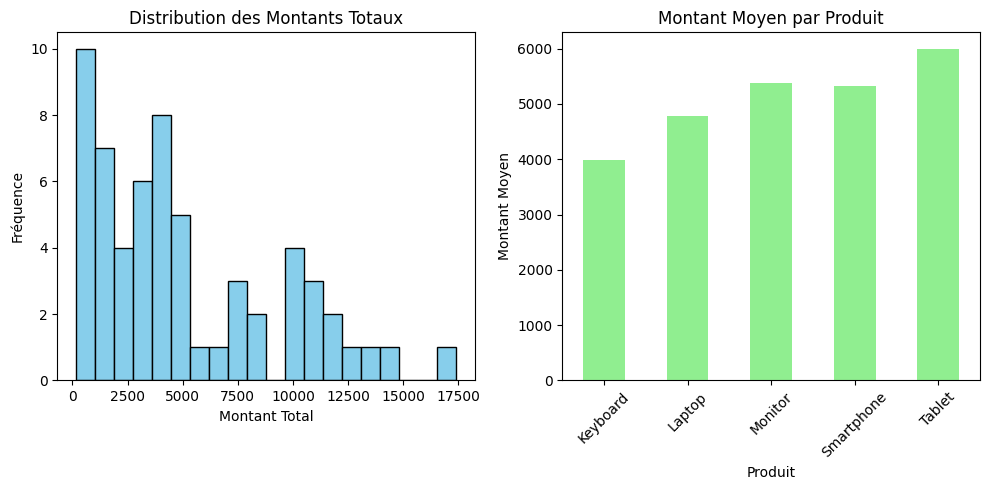

In [5]:
import matplotlib.pyplot as plt

# Histogramme des salaires
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_ventes['Montant_Total'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des Montants Totaux')
plt.xlabel('Montant Total')
plt.ylabel('Fréquence')

# Graphique à barres des montants par produit
plt.subplot(1, 2, 2)
montants_par_produit = df_ventes.groupby('Produit')['Montant_Total'].mean()
montants_par_produit.plot(kind='bar', color='lightgreen')
plt.title('Montant Moyen par Produit')
plt.xticks(rotation=45)
plt.xlabel('Produit')
plt.ylabel('Montant Moyen')

plt.tight_layout()
plt.show()


## Exercice 5 : Filtrage et Sélection Avancés
Maîtrisez les techniques de filtrage complexe et de sélection de colonnes. Vous allez :
Filtrer des données avec plusieurs conditions
Sélectionner des sous-ensembles spécifiques
Manipuler des colonnes

In [6]:
# Filtrage avec conditions multiples
ventes_importantes = df_ventes[(df_ventes['Montant_Total'] > 1000) & (df_ventes['Quantite'] > 5)]
print("Ventes importantes :")
print(ventes_importantes.head())

# Sélection de colonnes spécifiques
colonnes_selectionnees = df_ventes[['Date', 'Produit', 'Montant_Total']]
print("\nColonnes sélectionnées :")
print(colonnes_selectionnees.head())

# Manipulation de colonnes - Ajout d'une colonne prix unitaire
df_ventes['Prix_Unitaire'] = df_ventes['Montant_Total'] / df_ventes['Quantite']
print("\nPrix unitaires les plus élevés :")
print(df_ventes.nlargest(5, 'Prix_Unitaire')[['Produit', 'Prix_Unitaire']])



Ventes importantes :
         Date     Produit  Prix_Unitaire  Quantite  Montant_Total  Mois  Annee
1  2024-12-01    Keyboard         495.09         7        3465.63    12   2024
5  2024-11-27  Smartphone         954.53         9        8590.77    11   2024
7  2024-11-25      Tablet        1860.65         6       11163.90    11   2024
9  2024-11-23    Keyboard         720.43         7        5043.01    11   2024
10 2024-11-22     Monitor        1183.84         9       10654.56    11   2024

Colonnes sélectionnées :
        Date   Produit  Montant_Total
0 2024-12-02   Monitor        3631.20
1 2024-12-01  Keyboard        3465.63
2 2024-11-30    Tablet        3535.89
3 2024-11-29  Keyboard         957.00
4 2024-11-28  Keyboard        3400.68

Prix unitaires les plus élevés :
       Produit  Prix_Unitaire
44  Smartphone        1946.25
17    Keyboard        1933.99
12    Keyboard        1926.23
7       Tablet        1860.65
31     Monitor        1859.97
